## Note
Make sure to download model.safetensors from [kaggle](https://www.kaggle.com/code/prathmeshzade/trocr-hi/output) from model folder to this model_weights folder.


In [1]:
!pip install -q evaluate datasets jiwer transformers accelerate wandb

In [2]:
import torch
torch.__version__

'2.4.1+cpu'

In [3]:
# check if cuda is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [4]:
from torchvision.transforms import v2
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms.functional import InterpolationMode
# define transforms we are going to use RandomPerspective for our ocr model
# we are using transforms to avoid overfitting and to make our model more robust

train_transform = transforms = v2.Compose([
    v2.ElasticTransform(alpha=8.0, sigma=5.0, interpolation=InterpolationMode.BILINEAR, fill=0),
    v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.)),
    v2.Resize((384,384)),
    v2.ToTensor(),
    v2.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])

eval_transform = transforms = v2.Compose([
    # v2.Pad([80,364], padding_mode='constant', fill=244),
    v2.Resize((384,384)),
    v2.ToTensor(),
    v2.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])

# img=Image.open('/kaggle/input/hindi-ocr-synthetic-line-image-text-pair/data_80k/output_images/1.png')

d:\Python_Programs\env\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


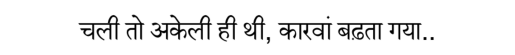

In [9]:
import requests
from io import StringIO
img=Image.open("./sample_img/train_img.png").convert("RGB")
img

In [10]:
import torch
import torchvision.transforms as v2
from transformers import VisionEncoderDecoderModel, AutoProcessor
model = VisionEncoderDecoderModel.from_pretrained("./model_weights")

processor = AutoProcessor.from_pretrained("./model_weights")
# device = torch.device('cpu')
model= model.to(device)
model.eval()
transform = v2.Compose([
    v2.Resize((384,384)),
    v2.ToTensor(),
    v2.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
])
img_t = transform(img).unsqueeze(0)
# p = processor(img, return_tensors="pt").pixel_values
p= img_t.to(device)

generated_ids = model.generate(p)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)
print(generated_ids)

चली तो अकेली ही थी, कारवां बढ़ता गया..
tensor([[  101,   101,   870, 15658, 21042,   851, 38150, 15658, 14080, 15837,
           117, 11081, 11549, 28960, 14018,   887, 89027, 13537, 14242,   119,
           119,   102]])
